In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
url = 'https://raw.githubusercontent.com/vkoul/data/main/misc/ride_data.csv'

In [8]:
df = pd.read_csv(url, parse_dates = ['Request timestamp', 'Drop timestamp'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [10]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT
2,3,Airport,80.0,Trip Completed,2016-11-07 00:24:00,2016-11-07 01:31:00
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT
4,5,Airport,264.0,Trip Completed,2016-11-07 00:36:00,2016-11-07 01:35:00


In [11]:
df['time_diff'] = df['Drop timestamp'] - df["Request timestamp"]

In [12]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,time_diff
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00,0 days 00:31:00
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT,NaT
2,3,Airport,80.0,Trip Completed,2016-11-07 00:24:00,2016-11-07 01:31:00,0 days 01:07:00
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT,NaT
4,5,Airport,264.0,Trip Completed,2016-11-07 00:36:00,2016-11-07 01:35:00,0 days 00:59:00


In [13]:
df["time_diff"] = df["time_diff"].astype('timedelta64[m]')

In [14]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,time_diff
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00,31.0
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT,NaN
2,3,Airport,80.0,Trip Completed,2016-11-07 00:24:00,2016-11-07 01:31:00,67.0
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT,NaN
4,5,Airport,264.0,Trip Completed,2016-11-07 00:36:00,2016-11-07 01:35:00,59.0


In [15]:
## missing values

In [16]:
df.isna().mean().round(2)

Request id           0.00
Pickup point         0.00
Driver id            0.39
Status               0.00
Request timestamp    0.00
Drop timestamp       0.58
time_diff            0.58
dtype: float64

In [17]:
df.columns = df.columns.str.lower()

In [18]:
df.columns = df.columns.str.replace(" ", "_")

In [19]:
df.columns

Index(['request_id', 'pickup_point', 'driver_id', 'status',
       'request_timestamp', 'drop_timestamp', 'time_diff'],
      dtype='object')

In [20]:
df.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,time_diff
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00,31.0
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT,NaN
2,3,Airport,80.0,Trip Completed,2016-11-07 00:24:00,2016-11-07 01:31:00,67.0
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT,NaN
4,5,Airport,264.0,Trip Completed,2016-11-07 00:36:00,2016-11-07 01:35:00,59.0


### Eda

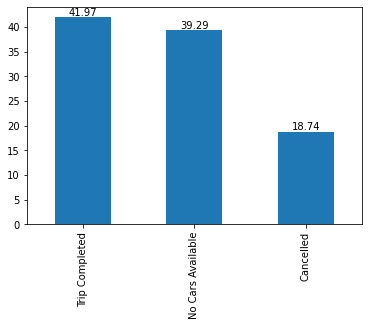

In [21]:
ax = df['status'].value_counts(normalize = True).multiply(100).round(2).plot(kind = 'bar');

ax.bar_label(ax.containers[0]);

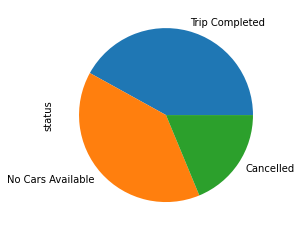

In [22]:
df['status'].value_counts(normalize = True).multiply(100).round(2).plot(kind = 'pie');

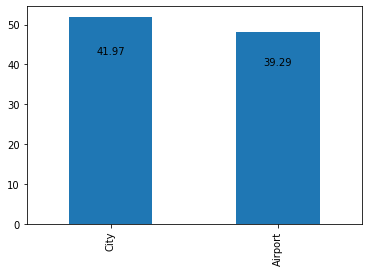

In [23]:
ax1 = df['pickup_point'].value_counts(normalize = True).multiply(100).round(2).plot(kind = 'bar');
ax1.bar_label(ax.containers[0]);

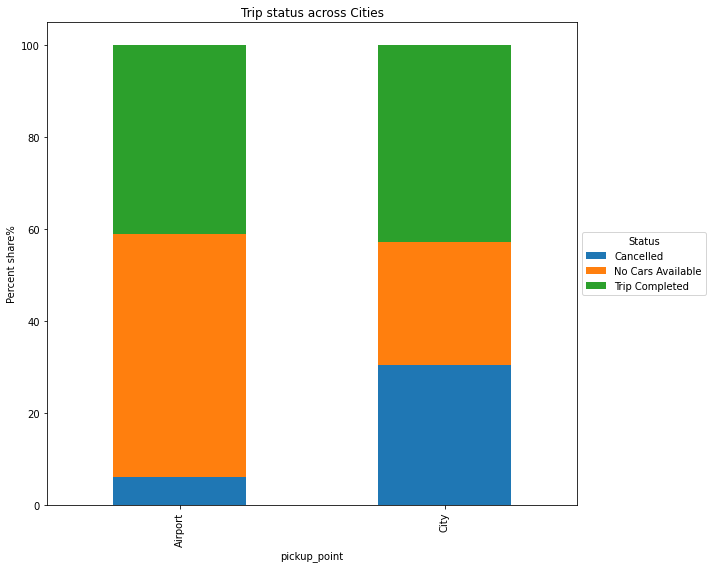

In [24]:
(df.groupby('pickup_point')['status'].value_counts(normalize=True)
   .unstack('status')
    .fillna(0).round(3).multiply(100)
    .plot.bar(stacked=True, title = "Trip status across Cities", figsize=(10, 8),  ylabel = "Percent share%")
   .legend(loc='center left',bbox_to_anchor=(1.0, 0.5), title = "Status")
);

plt.tight_layout()
plt.savefig("stacked_chart1.png", dpi = 400)

In [25]:
df['day_num'] = df['request_timestamp'].dt.weekday

In [26]:
df['weekday'] = df['request_timestamp'].dt.day_name()

In [27]:
df.head()

,request_id,pickup_point,driver_id,status,request_timestamp,drop_timestamp,time_diff,day_num,weekday
0,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00,31.0,0,Monday
1,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT,NaN,0,Monday
2,3,Airport,80.0,Trip Completed,2016-11-07 00:24:00,2016-11-07 01:31:00,67.0,0,Monday
3,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT,NaN,0,Monday
4,5,Airport,264.0,Trip Completed,2016-11-07 00:36:00,2016-11-07 01:35:00,59.0,0,Monday


In [28]:
df['day_num'].unique()

array([0, 2, 3, 4], dtype=int64)

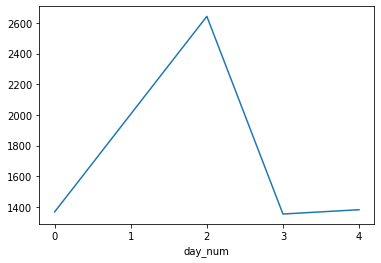

In [29]:
df.groupby('day_num')['request_id'].count().plot(kind = 'line', subplots = True);
plt.xticks([0,1,2,3,4]);

## References

* https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e
* https://stackoverflow.com/questions/22923775/calculate-time-difference-between-two-pandas-columns-in-hours-and-minutes
* https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
* https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.weekday.html
* https://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/how-pandas-uses-matplotlib-plus-figures-axes-and-subplots/

